# PANDAS

- PANDAS es "Python Data Analysis Library". El nombre proviene del término *Panel Data* que es un término econométrico para manejar conjuntos de datos multidimensionales.

- PANDAS es una biblioteca que provee de herramientas de alto desempeño, fáciles de usar, para manejar estructuras de datos y para su análisis. 

- PANDAS es un módulo que reúne las capacidades de Numpy, Scipy y Matplotlib.

- Véase https://pandas.pydata.org/ para más información.

- y en: https://vimeo.com/59324550




In [ ]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame

: 

## Series

- Las `Series` son arreglos unidimensionales indexados basados en los arreglos de Numpy.
- Pueden almacenar cualquier tipo de dato: int, floats, strings, Python objects, etc.
- Se pueden ver como una estructura de datos con dos arreglos: uno para los índices y otr. para los objetos que contiene.

### Ejemplo

In [ ]:
obj = Series([3,6,9,12])
obj

In [ ]:
obj.values # Objetos de la serie

In [ ]:
obj.index # Índices de la serie

- Comparemos con los array de Numpy

In [ ]:
x = np.array([3,6,9,12])
x

In [ ]:
print(type(obj.values))
print(type(x))
print(type(obj), type(obj.index))

- Podemos definir los índices como queramos:

In [ ]:
monedas = Series([10.0,5.0,2.0,1.0,0.5,0.2,0.1],
                 index=['Diez','Cinco','Dos','Un','cincuenta','veinte','diez'])
monedas

In [ ]:
monedas['diez'] # Podemos acceder al los objetos de la Serie con el índice

In [ ]:
print('{: .52f}'.format(monedas['diez']))

In [ ]:
monedas[monedas > 0.3] # Podemos hacer operaciones más complicadas

In [ ]:
'veinte' in monedas # Es posible preguntar si un índice está en la Serie

In [ ]:
0.1 in monedas  # Es posible preguntar si un objeto está en la Serie

In [ ]:
# Es posible transformar la Serie en diferentes tipos
monedas_list = monedas.to_string()
monedas_list

In [ ]:
# Transformar la Serie a un diccionario:
monedas_dic = monedas.to_dict()
monedas_dic

In [ ]:
# Transformar la Serie en el formato CSV:
monedas.to_csv()

### Ejercicio
Escribir el resultado de `monedas.to_csv()` a un archivo.

In [ ]:
#f open
#f write, monedas.to_csv
#f close

In [ ]:
# Podemos transformar un diccionario en una Serie.
monedasX = Series(monedas_dic) # Regresa a la Seria pero en desorden
monedasX

In [ ]:
# Si queremos la serie en orden, lo podemos hacer vía los índices:
etiquetas = ['Diez','Cinco','Dos','Un','cincuenta','veinte','diez']
monedasY = Series(monedas_dic, index=etiquetas) # En orden!
monedasY

In [ ]:
# Incluso podemos agregar índices a los originales
etiquetas = ['Diez','Cinco','quarter','Dos','Un','cincuenta','veinte','diez']
monedasZ = Series(monedas_dic, index=etiquetas) # Hay un índice extra.
monedasZ

In [ ]:
# Podemos verificar si hay datos faltantes (NaN)
pd.isnull(monedasZ['quarter'])     # Operación de PANDAS

In [ ]:
pd.notnull(monedasZ['diez'])   # Operación de PANDAS

In [ ]:
# Podemos sumar dos Series
monedas + monedasY

In [ ]:
# No importa que las series estén en desorden, la suma es correcta!
monedas + monedasX

In [ ]:
# Incluso podemos sumar series que tengan diferente longitud:
monedas + monedasZ

In [ ]:
# Las series tienen comportamiento, por ejemplo:
nombre = Series(list('Luis Miguel de la Cruz Salas'))
nombre.unique()

In [ ]:
# Puede contar los objetos que hay en la Serie
nombre.value_counts()

In [ ]:
# Podemos tener una serie con índices en desorden:
serie = Series(range(5),index=['C','A','B','E','D'])
serie

In [ ]:
# La serie se puede ordenar a través de los índices
serie.sort_index()

In [ ]:
serie   # Ojo: el ordenamiento no se hizo "in place", es decir no se modificó la serie original

In [ ]:
# Aquí creamos una nueva serie ordenada, pero la original prevalece
serie_ordenada = serie.sort_index()

In [ ]:
serie_ordenada

In [ ]:
serie

In [ ]:
# Podemos ordenar la serie "in place", es decir se modifica la serie original
serie.sort_index(inplace=True)
serie

In [ ]:
# Se puede ordenar la serie usando los objetos que contiene
serie.sort_values()

In [ ]:
# Creemos otra serie con valores e índices desordenados
serie = Series([7,5,2,8,3],index=['C','A','B','E','D'])
serie

In [ ]:
# La siguiente función "rankea" las entradas de la serie de acuerdo al contenido de su objeto
serie.rank()

In [ ]:
# Si ordenamos la serie que pasa ¿?:
serie.sort_values()

In [ ]:
# Se pueden usar varias de las funciones de Numpy
serie + 3

In [ ]:
serie**2

In [ ]:
np.sin(serie)

In [ ]:
# Keep digging please!!

### La función `apply`
```python
Series.apply(func, conver_dtype=True, args(), **kwds)
```
- La función `func` será aplicada a la serie y regresa un objeto de tipo Series o DataFrame.


In [ ]:
serie.apply(np.sin)

- Podemos usar funciones lambda

In [ ]:
serie

In [ ]:
serie.apply(lambda x: x if x > 5 else x**2)

### Filtrar o completar datos faltantes

In [ ]:
nueva_serie = monedas + monedasZ
nueva_serie

In [ ]:
nueva_serie.dropna() # Desecha los NaN 

In [ ]:
nueva_serie.fillna(3000) # Completa los NaN con 3000

## DataFrames

- La idea principal del os DaraFrames se basa en las hojas de cálculo.
- La estructura de un DataFrame son tablas similares a las hojas de cálculo.
- Contiene una colección ordenada de columnas.
- Cada columna consiste de un typo de dato único.
- Pero, diferentes columnas pueden tener diferens tipos: la primera columna podría contener cadenas, la segunda flotantes, la tercera Boleanos, etc.
- También tiene una columna de índice: es como un diccionario de Series con un índice común.


In [ ]:
# Mi primer DataFrame
dframe = DataFrame(np.arange(12).reshape(4,3))

In [ ]:
dframe

- En este ejemplo `dframe` se construye convirtiendo un arreglo multidimensional de **numpy** con la forma: 4 renglones X 3 columnas, en un objeto de tipo DataFrame, pre-llenado con los valores del 0 al 11. Los índices por omisión de los renglones van de 0 a 3 y los de las columnas de 0 a 2.  

In [ ]:
type(dframe)

## Construir un DataFrame a partir de un diccionario

In [ ]:
datos = {'Delegación':['Coyoacán','Tlalpan','Xochimilco'],
         'Población':[837000,3880000,8400000]}
delegaciones = DataFrame(datos)
delegaciones

## Agregar una Serie a un DataFrame

In [ ]:
IMECAS = Series([90,100,120], index=[0,1,2])
print(IMECAS)
delegaciones['Cal. Aire'] = IMECAS
delegaciones

## Leer un DataFrame de un sitio web

In [2]:
import webbrowser
website = 'http://en.wikipedia.org/wiki/NFL_win-loss_records'
webbrowser.open(website)

True

In [4]:
pd.read_clipboard(engine='python')  #selecciona con el cursor la tabla que se encuentra en la pagina web

,Rank,Team,GP,Won,Lost,Tied,Pct.,First NFL season,Division
0,1,Green Bay Packers,"1,401",782,581,38,0.572,1921,NFC North
1,2,Dallas Cowboys,947,538,403,6,0.571,1960,NFC East
2,3,New England Patriots,949,529,411,9,0.562,1960,AFC East
3,4,Chicago Bears,"1,435",783,610,42,0.560,1920,NFC North
4,5,Baltimore Ravens,417,233,183,1,0.560,1996,AFC North
5,6,Miami Dolphins,865,476,385,4,0.553,1966,AFC East
6,7,Minnesota Vikings,935,503,421,11,0.544,1961,NFC North
7,8,Kansas City Chiefs,949,507,430,12,0.541,1960,AFC West
8,9,Pittsburgh Steelers,"1,237",652,563,22,0.536,1933,AFC North
9,10,San Francisco 49ers,"1,067",561,492,14,0.532,1950,NFC West


In [13]:
# Antes de ejecutar esta celda, seleccione los 10 primeros renglones
# de la tabla, incluyendo los títulos y copialos al clipboard, es decir
# teclear [Ctrl + c]
nfl_frame = pd.read_clipboard(engine='python')

In [14]:
nfl_frame

,Rank,Team,GP,Won,Lost,Tied,Pct.,First,NFL,season,Division
1,Green,Bay,Packers,"1,401",782,581,38.000,0.572,1921,NFC,North
2,Dallas,Cowboys,947,538,403,6,0.571,1960.000,NFC,East,None
3,New,England,Patriots,949,529,411,9.000,0.562,1960,AFC,East
4,Chicago,Bears,"1,435",783,610,42,0.560,1920.000,NFC,North,None
5,Baltimore,Ravens,417,233,183,1,0.560,1996.000,AFC,North,None
6,Miami,Dolphins,865,476,385,4,0.553,1966.000,AFC,East,None
7,Minnesota,Vikings,935,503,421,11,0.544,1961.000,NFC,North,None
8,Kansas,City,Chiefs,949,507,430,12.000,0.541,1960,AFC,West
9,Pittsburgh,Steelers,"1,237",652,563,22,0.536,1933.000,AFC,North,None
10,San,Francisco,49ers,"1,067",561,492,14.000,0.532,1950,NFC,West


In [15]:
type(nfl_frame)

pandas.core.frame.DataFrame

In [16]:
nfl_frame.columns # Lista las columnas del DataFrame

Index(['Rank', 'Team', 'GP', 'Won', 'Lost', 'Tied', 'Pct.', 'First', 'NFL',
       'season', 'Division'],
      dtype='object')

In [17]:
nfl_frame['GP'] # Imprime la columa que concide con "Total Games "

1        Packers
2            947
3       Patriots
4          1,435
5            417
6            865
7            935
8         Chiefs
9          1,237
10         49ers
11         1,031
12        Giants
13           949
14       Raiders
15           725
16          Rams
17      Chargers
18         1,267
19           949
20         1,019
21         1,253
22           949
23           433
24        Saints
25         1,298
26           837
27          Jets
28           865
29           321
30         1,395
31           433
32    Buccaneers
Name: GP, dtype: object

In [ ]:
# Puedo crear un DataFrame elegiendo columnas de otro DataFrame
nuevo_DF = DataFrame(nfl_frame,columns=['Team ','First Season ','Total Games '])
nuevo_DF

In [ ]:
nfl_frame.head() # Los primeros 5 renglones

In [ ]:
nfl_frame.head(3) # Los primeos 3 renglones

In [ ]:
nfl_frame.tail(3) # Los últimos tres renglones

In [ ]:
nfl_frame.ix[3] # Ojo: esta función será eliminada en el futuro!

In [ ]:
nfl_frame.loc[3] # La función ix ha sido sustituida por loc, que permite acceder a un renglón

# Se pueden renombrar las columnas

In [ ]:
dframe

In [ ]:
dframe.rename(index={0:'a',1:'b',2:'c',3:'d'}, columns={0:'col1',1:'col2', 2:'col3'}, inplace=True)

In [ ]:
dframe

In [ ]:
nfl_frame.head(2)

In [ ]:
nfl_frame.rename(columns = {'Team ':'Equipo'}, inplace=True)

In [ ]:
nfl_frame.head(2)

In [ ]:
nfl_frame.

# Leyendo archivos CSV

In [5]:
dframe_wine = pd.read_csv('winequality-red.csv',sep=';') # Lectura de CSV

In [26]:
dframe_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
652,15.9,0.36,0.65,7.5,0.096,22.0,71.0,0.99760,2.98,0.84,14.9,5
588,5.0,0.42,0.24,2.0,0.060,19.0,50.0,0.99170,3.72,0.74,14.0,8
142,5.2,0.34,0.00,1.8,0.050,27.0,63.0,0.99160,3.68,0.79,14.0,6
144,5.2,0.34,0.00,1.8,0.050,27.0,63.0,0.99160,3.68,0.79,14.0,6
1270,5.0,0.38,0.01,1.6,0.048,26.0,60.0,0.99084,3.70,0.75,14.0,6


In [28]:
dframe_wine['alcohol'].mean() # Se puede calcular la media de una columna

10.422983114446529

In [29]:
dframe_wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
652,15.9,0.36,0.65,7.5,0.096,22.0,71.0,0.99760,2.98,0.84,14.9,5
588,5.0,0.42,0.24,2.0,0.060,19.0,50.0,0.99170,3.72,0.74,14.0,8
142,5.2,0.34,0.00,1.8,0.050,27.0,63.0,0.99160,3.68,0.79,14.0,6
144,5.2,0.34,0.00,1.8,0.050,27.0,63.0,0.99160,3.68,0.79,14.0,6
1270,5.0,0.38,0.01,1.6,0.048,26.0,60.0,0.99084,3.70,0.75,14.0,6
...,...,...,...,...,...,...,...,...,...,...,...,...
371,7.9,0.24,0.40,1.6,0.056,11.0,25.0,0.99670,3.32,0.87,8.7,6
528,8.2,0.42,0.49,2.6,0.084,32.0,55.0,0.99880,3.34,0.75,8.7,6
1436,10.0,0.38,0.38,1.6,0.169,27.0,90.0,0.99914,3.15,0.65,8.5,5
544,14.3,0.31,0.74,1.8,0.075,6.0,15.0,1.00080,2.86,0.79,8.4,6


# Agrupación, agregación y funciones definidas por el usuario

In [22]:
def difMaxMin(arr):
    """
    Calcula la diferencia entre el valor mínimo y máximo de un arreglo.
    """
    return arr.max() - arr.min()

In [23]:
wino = dframe_wine.groupby('quality') # Agrupa una serie
print(type(wino))                     # regresa un DataFrame agrupado
print(type(dframe_wine))

<class 'pandas.core.groupby.generic.DataFrameGroupBy'>
<class 'pandas.core.frame.DataFrame'>


In [24]:
print(wino) # Solo puestra el tipo de objeto

In [25]:
wino.describe() # Muestra el DataFrame agrupado

fixed acidity                                                     \
                count      mean       std  min   25%   50%     75%   max   
quality                                                                    
3                10.0  8.360000  1.770875  6.7  7.15  7.50   9.875  11.6   
4                53.0  7.779245  1.626624  4.6  6.80  7.50   8.400  12.5   
5               681.0  8.167254  1.563988  5.0  7.10  7.80   8.900  15.9   
6               638.0  8.347179  1.797849  4.7  7.00  7.90   9.400  14.3   
7               199.0  8.872362  1.992483  4.9  7.40  8.80  10.100  15.6   
8                18.0  8.566667  2.119656  5.0  7.25  8.25  10.225  12.6   

        volatile acidity            ... sulphates       alcohol             \
                   count      mean  ...       75%   max   count       mean   
quality                             ...                                      
3                   10.0  0.884500  ...     0.615  0.86    10.0   9.955000   
4                   53.0  0.693962  ...     0.600  2.00    53.0  10.265094   
5                  681.0  0.577041  ...     0.660  1.98   681.0   9.899706   
6                  638.0  0.497484  ...     0.750  1.95   638.0  10.629519   
7                  199.0  0.403920  ...     0.830  1.36   199.0  11.465913   
8                   18.0  0.423333  ...     0.820  1.10    18.0  12.094444   

                                                      
              std  min     25%     50%     75%   max  
quality                                               
3        0.818009  8.4   9.725   9.925  10.575  11.0  
4        0.934776  9.0   9.600  10.000  11.000  13.1  
5        0.736521  8.5   9.400   9.700  10.200  14.9  
6        1.049639  8.4   9.800  10.500  11.300  14.0  
7        0.961933  9.2  10.800  11.500  12.100  14.0  
8        1.224011  9.8  11.325  12.150  12.875  14.0  

[6 rows x 88 columns]

- Obsérvese que la función groupby() también calcula algunos datos estadísticos y ordena el resultado por el nombre de la columna (orden alfabético).

In [26]:
wino.agg(difMaxMin) # Ahora aplicamos nuestra función

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,4.9,1.140,0.66,4.5,0.206,31.0,40.0,0.00609,0.47,0.46,2.6
4,7.9,0.900,1.00,11.6,0.565,38.0,112.0,0.00760,1.16,1.67,4.1
5,10.9,1.150,0.79,14.3,0.572,65.0,149.0,0.01059,0.86,1.61,6.4
6,9.6,0.880,0.78,14.5,0.381,71.0,159.0,0.01362,1.15,1.55,5.6
7,10.7,0.795,0.76,7.7,0.346,51.0,282.0,0.01256,0.86,0.97,4.8
8,7.6,0.590,0.69,5.0,0.042,39.0,76.0,0.00800,0.84,0.47,4.2


In [27]:
wino.agg('mean') # También podemos aplicar una función ya definida en la biblioteca
                 # sum, min, max, std, count, ...

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,8.360000,0.884500,0.171000,2.635000,0.122500,11.000000,24.900000,0.997464,3.398000,0.570000,9.955000
4,7.779245,0.693962,0.174151,2.694340,0.090679,12.264151,36.245283,0.996542,3.381509,0.596415,10.265094
5,8.167254,0.577041,0.243686,2.528855,0.092736,16.983847,56.513950,0.997104,3.304949,0.620969,9.899706
6,8.347179,0.497484,0.273824,2.477194,0.084956,15.711599,40.869906,0.996615,3.318072,0.675329,10.629519
7,8.872362,0.403920,0.375176,2.720603,0.076588,14.045226,35.020101,0.996104,3.290754,0.741256,11.465913
8,8.566667,0.423333,0.391111,2.577778,0.068444,13.277778,33.444444,0.995212,3.267222,0.767778,12.094444


### Agregando una columna a nuestro DataFrame

In [30]:
dframe_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
652,15.9,0.36,0.65,7.5,0.096,22.0,71.0,0.99760,2.98,0.84,14.9,5
588,5.0,0.42,0.24,2.0,0.060,19.0,50.0,0.99170,3.72,0.74,14.0,8
142,5.2,0.34,0.00,1.8,0.050,27.0,63.0,0.99160,3.68,0.79,14.0,6
144,5.2,0.34,0.00,1.8,0.050,27.0,63.0,0.99160,3.68,0.79,14.0,6
1270,5.0,0.38,0.01,1.6,0.048,26.0,60.0,0.99084,3.70,0.75,14.0,6


In [31]:
# Agrega la columna realizando un cálculo entre valores de otras columnas
dframe_wine['qual/alc ratio'] = dframe_wine['quality'] / dframe_wine['alcohol']

In [32]:
dframe_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,qual/alc ratio
652,15.9,0.36,0.65,7.5,0.096,22.0,71.0,0.99760,2.98,0.84,14.9,5,0.335570
588,5.0,0.42,0.24,2.0,0.060,19.0,50.0,0.99170,3.72,0.74,14.0,8,0.571429
142,5.2,0.34,0.00,1.8,0.050,27.0,63.0,0.99160,3.68,0.79,14.0,6,0.428571
144,5.2,0.34,0.00,1.8,0.050,27.0,63.0,0.99160,3.68,0.79,14.0,6,0.428571
1270,5.0,0.38,0.01,1.6,0.048,26.0,60.0,0.99084,3.70,0.75,14.0,6,0.428571


In [33]:
dframe_wine.head() # recordemos como es el DataFrame original

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,qual/alc ratio
652,15.9,0.36,0.65,7.5,0.096,22.0,71.0,0.99760,2.98,0.84,14.9,5,0.335570
588,5.0,0.42,0.24,2.0,0.060,19.0,50.0,0.99170,3.72,0.74,14.0,8,0.571429
142,5.2,0.34,0.00,1.8,0.050,27.0,63.0,0.99160,3.68,0.79,14.0,6,0.428571
144,5.2,0.34,0.00,1.8,0.050,27.0,63.0,0.99160,3.68,0.79,14.0,6,0.428571
1270,5.0,0.38,0.01,1.6,0.048,26.0,60.0,0.99084,3.70,0.75,14.0,6,0.428571


# Graficación con matplotlib

In [34]:
%matplotlib inline

<AxesSubplot:xlabel='quality', ylabel='alcohol'>

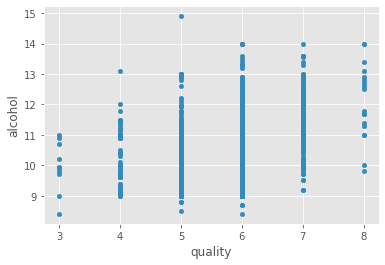

In [35]:
dframe_wine.plot(kind='scatter',x='quality',y='alcohol')

In [36]:
dframe_wine.sort_values('alcohol',ascending = False,inplace=True)

In [37]:
dframe_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,qual/alc ratio
652,15.9,0.36,0.65,7.5,0.096,22.0,71.0,0.99760,2.98,0.84,14.9,5,0.335570
588,5.0,0.42,0.24,2.0,0.060,19.0,50.0,0.99170,3.72,0.74,14.0,8,0.571429
142,5.2,0.34,0.00,1.8,0.050,27.0,63.0,0.99160,3.68,0.79,14.0,6,0.428571
144,5.2,0.34,0.00,1.8,0.050,27.0,63.0,0.99160,3.68,0.79,14.0,6,0.428571
1270,5.0,0.38,0.01,1.6,0.048,26.0,60.0,0.99084,3.70,0.75,14.0,6,0.428571


In [38]:
num_of_qual = dframe_wine['quality'].value_counts()

In [39]:
num_of_qual

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [13]:
dframe_wine[dframe_wine.chlorides == 1].head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality


# Cálculos complicados (Pivot Tables, etc...)


### Tablas dinamicas

*A pivot table is a table of grouped values that aggregates the individual items of a more extensive table (such as from a database, spreadsheet, or business intelligence program) within one or more discrete categories. This summary might include sums, averages, or other statistics, which the pivot table groups together using a chosen aggregation function applied to the grouped values. Although pivot table is a generic term, Microsoft trademarked. PivotTable in the United States in 1994 (which was canceled in 2020).*

 <div style="text-align: right"> Wikipedia </div>




Tutorial: http://pbpython.com/pandas-pivot-table-explained.html

# Graficación con `matplotlib`

In [14]:
dframe = pd.read_table('pets.txt',sep=' ')
dframe

,Sample,Animal,Intelligence
0,1,Dog,Smart
1,2,Dog,Smart
2,3,Cat,Dumb
3,4,Cat,Dumb
4,5,Dog,Dumb
5,6,Cat,Smart


In [15]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [16]:
dataset1 = np.random.randn(100)

(array([ 9., 13., 11., 13., 16., 12., 14.,  7.,  2.,  3.]),
 array([-1.85441111, -1.41908257, -0.98375403, -0.54842549, -0.11309695,
         0.3222316 ,  0.75756014,  1.19288868,  1.62821722,  2.06354577,
         2.49887431]),
 <BarContainer object of 10 artists>)

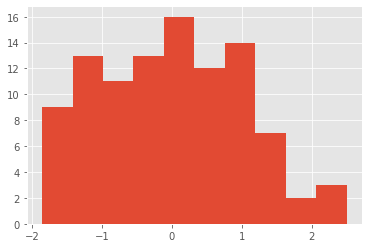

In [17]:
plt.hist(dataset1)

(array([ 1.,  5.,  7., 14., 17., 20., 11.,  4.,  0.,  1.]),
 array([-2.89723311, -2.31042907, -1.72362502, -1.13682098, -0.55001693,
         0.03678711,  0.62359116,  1.21039521,  1.79719925,  2.3840033 ,
         2.97080734]),
 <BarContainer object of 10 artists>)

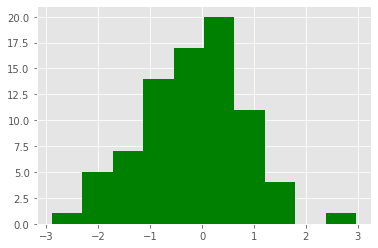

In [18]:
dataset2 = np.random.randn(80)
plt.hist(dataset2,color='green')

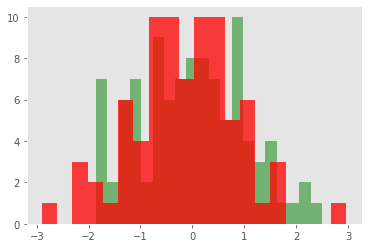

In [19]:
plt.hist(dataset1,color='green',alpha=0.5,bins=20)
plt.hist(dataset2,color='red',alpha=0.75,bins=20)
plt.grid()

# Graficación con `seaborn`

In [20]:
import seaborn as sns

In [21]:
data1 = np.random.randn(1000)
data2 = np.random.randn(1000)

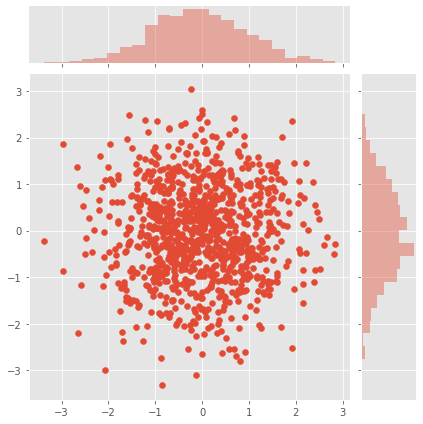

In [22]:
sns.jointplot(data1,data2)

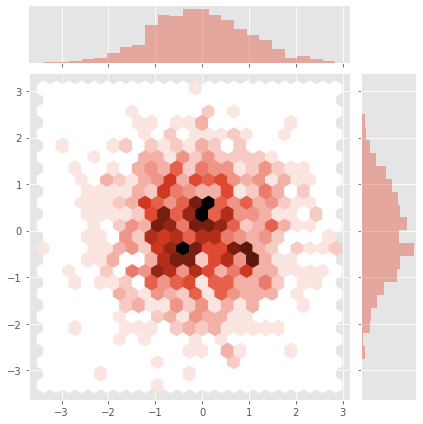

In [23]:
sns.jointplot(data1,data2,kind='hex')

In [3]:
df = pd.DataFrame({
    'col1': ['A', 'A', 'B', np.nan, 'D', 'C'],
    'col2': [2, 1, 9, 8, 7, 4],
    'col3': [0, 1, 9, 4, 2, 3],
    'col4': ['a', 'B', 'c', 'D', 'e', 'F']
})

In [4]:
import matplotlib.pyplot as plt

In [5]:
df

,col1,col2,col3,col4
0,A,2,0,a
1,A,1,1,B
2,B,9,9,c
3,NaN,8,4,D
4,D,7,2,e
5,C,4,3,F


In [7]:
df.sort_values(by='col2')

,col1,col2,col3,col4
1,A,1,1,B
0,A,2,0,a
5,C,4,3,F
4,D,7,2,e
3,NaN,8,4,D
2,B,9,9,c


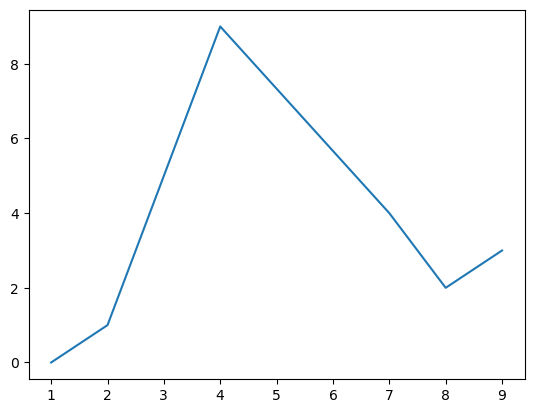

In [9]:
plt.plot(df.sort_values(by='col2')['col2'],df['col3'])